# Exercise 1: Superposition and entanglement

Complete the following snippets provided in the notebook.

## Imports from the Qiskit package

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import *
from qiskit.quantum_info import state_fidelity
# Magic function to render plots in the notebook after the cell executing the plot command
%matplotlib inline

### Function for convenience which allows for running the simulator and extracting the results

In [2]:
def run_on_qasm_simulator(quantum_circuit, num_shots):
    """Takes a circuit, the number of shots and a backend and returns the counts for running the circuit
    on the qasm_simulator backend."""
    qasm_simulator = Aer.get_backend('qasm_simulator')
    job = execute(quantum_circuit, backend=qasm_simulator, shots=num_shots)
    result = job.result()
    counts = result.get_counts(quantum_circuit)
    return counts

##  <font color='orange'>Superpostion</font> 

The goal of this exercise is to generate superposition. Complete the following tasks:
1. Create a single-qubit quantum circuit with a single Hadamard gate.
3. Visualize the circuit and make sure it is correct.
4. Measure the results with 100, 5000, 1000 and 10000 shots and visualize the result. What do you observe?

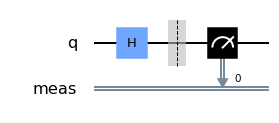

In [3]:
# Create a quantum circuit with a single qubit
qc1 = QuantumCircuit(1)
# Add the Hadamard gate
qc1.h(0)
# Add the final measurement
qc1.measure_all()
# Visualize the circuit
qc1.draw(output='mpl')

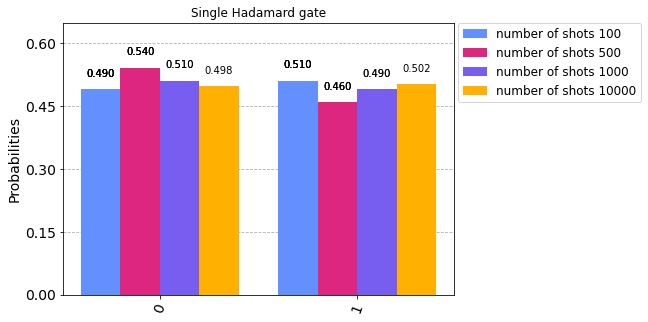

In [4]:
# Now we run the circuit various number of shots
num_shots = [100, 500, 1000, 10000]
res_qc1 = list()
for curr_shots in num_shots:
    res_qc1.append(run_on_qasm_simulator(qc1, curr_shots))
# Visualize the results in form of a histogram
plot_histogram(res_qc1, title='Single Hadamard gate', legend=['number of shots ' + str(x) for x in num_shots])

With increasing number of shots, we get closer and closer to the exact result.

##  <font color='orange'>Entanglement</font>

Now that we have understood how the Hadamard gate acts, let us use it to generate an entangled state. Complete the following tasks:
1. Create a two-qubit quantum circuit the circuit creating a Bell state.
3. Visualize the circuit and make sure it is correct.
4. Measure the results with 100, 5000, 1000 and 10000 shots and visualize the result. What do you observe?

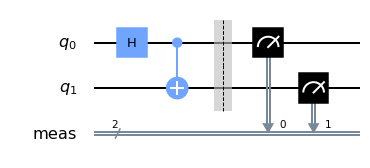

In [5]:
# Create a quantum circuit with two qubits
qc2 = QuantumCircuit(2)
# Add the gates creating a Bell state
qc2.h(0)
qc2.cnot(0,1)
# Add the final measurement
qc2.measure_all()
# Visualize the circuit
qc2.draw(output='mpl')

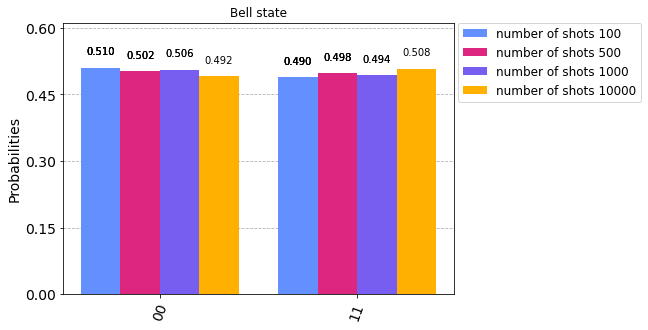

In [6]:
# Now we run the circuit various number of shots
num_shots = [100, 500, 1000, 10000]
res_qc2 = list()
for curr_shots in num_shots:
    res_qc2.append(run_on_qasm_simulator(qc2, curr_shots))
# Visualize the results in form of a histogram
plot_histogram(res_qc2, title='Bell state', legend=['number of shots ' + str(x) for x in num_shots])

Again, we observe that with an increasing number of shots, we get closer and closer to the exact result.

## <font color='green'>Optional tasks</font>

The circuit which you have implemented above yields the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle\otimes |0\rangle + |1\rangle\otimes|1\rangle\right)$. There are three more Bell states given by

$$ |\Phi^-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle\otimes |0\rangle - |1\rangle\otimes|1\rangle\right)$$
$$ |\Psi^+\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle\otimes |1\rangle + |1\rangle\otimes|0\rangle\right)$$
$$ |\Psi^-\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle\otimes |1\rangle - |1\rangle\otimes|0\rangle\right).$$

Can you find circuits preparing the other three Bell states? Convince yourself that the Bell states are indeed orthogonal using the state_vector backend of Aer.

In [7]:
# We prepare a similar function for running on the state vector simulator
def run_on_statevector_simulator(quantum_circuit, decimals=6):
    """Takes a circuit, and runs it on the state vector simulator backend."""
    statevector_simulator = Aer.get_backend('statevector_simulator')
    job = execute(quantum_circuit, backend=statevector_simulator)
    result = job.result()    
    statevector = result.get_statevector(quantum_circuit, decimals=decimals)
    return statevector

### The state $|\Phi^-\rangle$

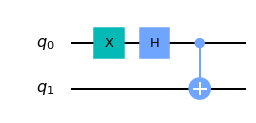

In [8]:
# Let us first prepare the Phi^- state
qc_phi_minus = QuantumCircuit(2)
qc_phi_minus.x(0)
qc_phi_minus.h(0)
qc_phi_minus.cnot(0,1)
qc_phi_minus.draw(output='mpl')

In [9]:
# To obtain the statevector, we run on Aer's state vector simulator. Note, that there is no measurement at the end
# when running on the state vector simulator, as otherwise the state would collapse onto one of the computational
# basis states and we do not get the actual state vector prepared by the circuit
phi_minus_state = run_on_statevector_simulator(qc_phi_minus)
print('|Phi^-> =', phi_minus_state)

|Phi^-> = [ 0.70710678-8.65956056e-17j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j -0.70710678+8.65956056e-17j]


### The state $|\Psi^+\rangle$

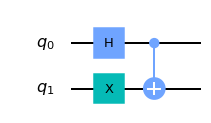

In [10]:
#The Psi^+ state
qc_psi_plus = QuantumCircuit(2)
qc_psi_plus.x(1)
qc_psi_plus.h(0)
qc_psi_plus.cnot(0,1)
qc_psi_plus.draw(output='mpl')

In [11]:
psi_plus_state = run_on_statevector_simulator(qc_psi_plus)
print('|Psi^+> =', psi_plus_state)

|Psi^+> = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


### The state $|\Psi^-\rangle$

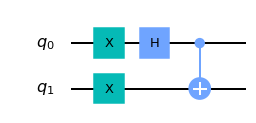

In [12]:
# Let us first prepare the Psi^- state
qc_psi_minus = QuantumCircuit(2)
qc_psi_minus.x(0)
qc_psi_minus.x(1)
qc_psi_minus.h(0)
qc_psi_minus.cnot(0,1)
qc_psi_minus.draw(output='mpl')

In [13]:
psi_minus_state = run_on_statevector_simulator(qc_psi_minus)
print('|Psi^-> =', psi_minus_state)

|Psi^-> = [ 0.        +0.00000000e+00j -0.70710678+8.65956056e-17j
  0.70710678-8.65956056e-17j  0.        +0.00000000e+00j]


### The state $|\Phi^+\rangle$ (which we already know)

In [14]:
# Let us first prepare the Phi^+ state
qc_phi_plus = QuantumCircuit(2)
qc_phi_plus.h(0)
qc_phi_plus.cnot(0,1)
qc_phi_plus.draw(output='mpl')
phi_plus_state = run_on_statevector_simulator(qc_phi_plus)
print('|Phi^+> =', phi_plus_state)

|Phi^+> = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


### Check the orthogonality of the Bell states

In [15]:
print('|<Phi^+|Phi^->|^2 =', state_fidelity(phi_plus_state, phi_minus_state))
print('|<Phi^+|Psi^+>|^2 =', state_fidelity(phi_plus_state, psi_plus_state))
print('|<Phi^+|Psi^->|^2 =', state_fidelity(phi_plus_state, psi_minus_state))
print('|<Psi^+|Psi^->|^2 =', state_fidelity(psi_plus_state, phi_minus_state))
print('|<Psi^+|Phi^->|^2 =', state_fidelity(psi_plus_state, phi_minus_state))
print('|<Phi^-|Psi^->|^2 =', state_fidelity(phi_minus_state, psi_minus_state))

|<Phi^+|Phi^->|^2 = 0.0
|<Phi^+|Psi^+>|^2 = 0.0
|<Phi^+|Psi^->|^2 = 0.0
|<Psi^+|Psi^->|^2 = 0.0
|<Psi^+|Phi^->|^2 = 0.0
|<Phi^-|Psi^->|^2 = 0.0
